# Import LIbraries

In [1]:
import numpy as np                                
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.optimizers import SGD, Adam
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Import DataSet

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


# Show Images

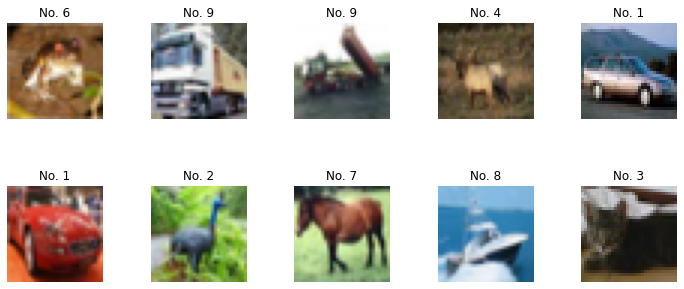

In [3]:
f, ax = plt.subplots(2, 5, figsize=(12, 5), gridspec_kw={'wspace':0.5, 'hspace':0.5}, squeeze=True)

for r in range(2):
  for c in range(5):
    image_ind = r * 5 + c
    ax[r,c].axis("off")
    ax[r,c].imshow(train_images[image_ind], cmap='gray')
    ax[r,c].set_title("No. %d" % train_labels[image_ind])
plt.show()

# Show Histogram of number of examples per class in the training and test sets

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


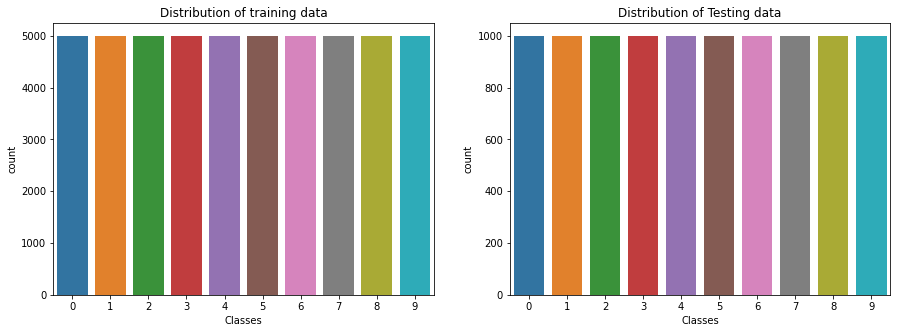

In [4]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(train_labels.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(test_labels.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

# Information about DataSet

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
len(train_labels)

50000

In [7]:
test_labels.shape

(10000, 1)

In [8]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# Using Data Augmentation

In [9]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(train_images)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


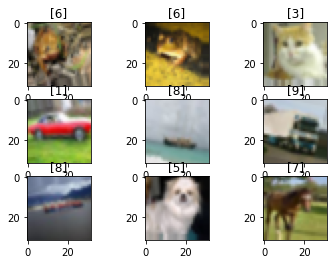

In [10]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(train_images, train_labels, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
        plt.title(y_batch[i])
    plt.show()
    break

# Reshaping & Scalling

In [11]:
train_images.shape

(50000, 32, 32, 3)

In [12]:
train_images = train_images.reshape(50000, 32 , 32 ,3)
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape(10000, 32 , 32 , 3)
test_images = test_images.astype("float32") / 255

In [13]:
train_images.shape

(50000, 32, 32, 3)

# Encoding the Labels

In [14]:
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [15]:
train_labels.shape

(50000, 10)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, stratify=train_labels, shuffle=True)

# Import VGG16 Model

In [17]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))


In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [19]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


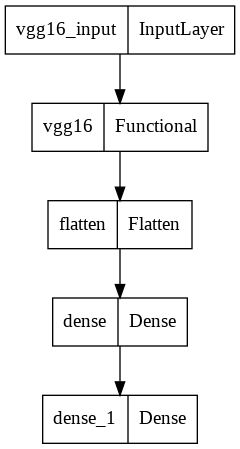

In [21]:
plot_model(model)

# Compilation Model (loss + optimizer)

In [22]:
model.compile(optimizer=Adam(learning_rate=1e-3, decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning

In [23]:
histroy = model.fit(datagen.flow(x_train, y_train, batch_size=80) ,epochs=10,validation_data=datagen.flow(x_test, y_test, batch_size=20), batch_size=1024)

Epoch 1/10
500/500 [==============================] - 39s 69ms/step - loss: 1.9071 - accuracy: 0.2459 - val_loss: 1.6058 - val_accuracy: 0.3478
Epoch 2/10
500/500 [==============================] - 33s 66ms/step - loss: 1.4515 - accuracy: 0.4427 - val_loss: 1.2717 - val_accuracy: 0.5180
Epoch 3/10
500/500 [==============================] - 32s 64ms/step - loss: 1.1945 - accuracy: 0.5712 - val_loss: 1.2415 - val_accuracy: 0.5795
Epoch 4/10
500/500 [==============================] - 32s 64ms/step - loss: 1.0393 - accuracy: 0.6384 - val_loss: 0.9867 - val_accuracy: 0.6551
Epoch 5/10
500/500 [==============================] - 32s 65ms/step - loss: 0.9233 - accuracy: 0.6838 - val_loss: 0.8740 - val_accuracy: 0.6976
Epoch 6/10
500/500 [==============================] - 32s 64ms/step - loss: 0.8437 - accuracy: 0.7128 - val_loss: 0.8809 - val_accuracy: 0.7129
Epoch 7/10
500/500 [==============================] - 32s 64ms/step - loss: 0.7792 - accuracy: 0.7402 - val_loss: 0.8881 - val_accuracy:

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.6609 - accuracy: 0.7806


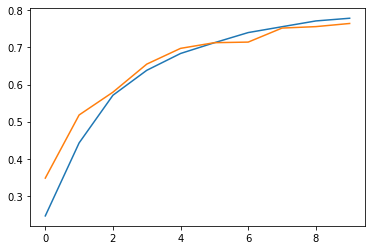

In [25]:
plt.plot(histroy.history["accuracy"])
plt.plot(histroy.history['val_accuracy'])

plt.show()

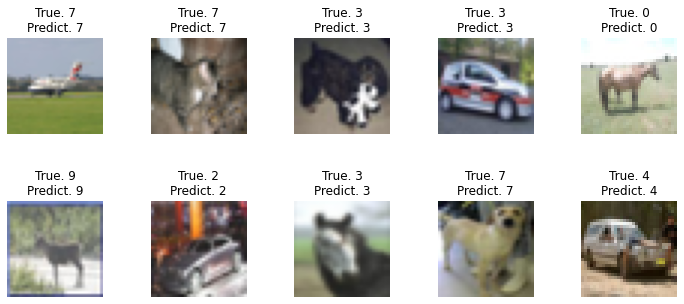

In [27]:
f, ax = plt.subplots(2, 5, figsize=(12, 5), gridspec_kw={'wspace':0.5, 'hspace':0.5}, squeeze=True)

for r in range(2):
  for c in range(5):
    image_ind = np.random.randint(10000)
    img = test_images[image_ind]
    ax[r,c].axis("off")
    ax[r,c].imshow(train_images[image_ind], cmap='gray')
    ax[r,c].set_title(f"True. {np.argmax(test_labels[image_ind])}\nPredict. {np.argmax(model.predict(np.reshape(img, (1,32,32,3))))}")
plt.show()

# Save Model

In [28]:
model.save('project_model.h5')